PyTorch Version: 2.8.0+cpu


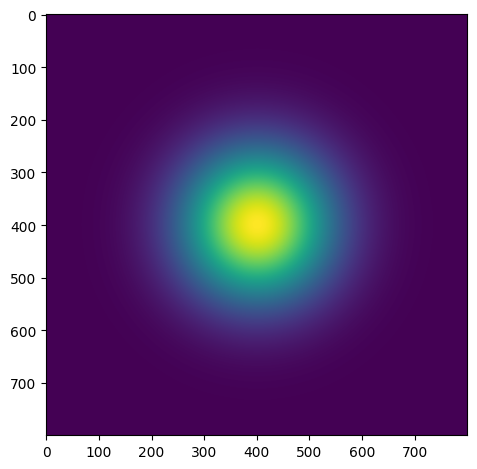

In [69]:
import torch
import numpy as np
#plot
import matplotlib.pyplot as plt

print("PyTorch Version:", torch.__version__)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute Gaussian
z = torch.exp(-(x**2+y**2)/2.0)


plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()


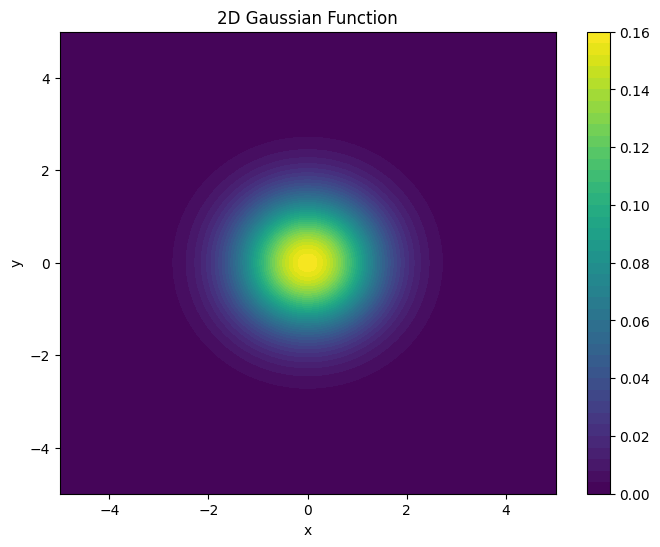

In [70]:
#Using ChatGPT Version to generate a Gaussian thingy
#Prompt: Generate a Python script to plot a 2D Gaussian function using Numpy and Matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Define the 2D Gaussian function
def gaussian_2d(x, y, mux, muy, sx, sy):
    return (1 / (2 * np.pi * sx * sy)) * np.exp(-(((x - mux)**2 / (2 * sx**2)) + ((y - muy)**2 / (2 * sy**2))))

# Parameters for the Gaussian
mux, muy = 0, 0     # Mean (center) in x and y
sx, sy = 1, 1       # Standard deviations in x and y

# Create grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Compute Gaussian values on the grid
Z = gaussian_2d(X, Y, mux, muy, sx, sy)

# Plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('2D Gaussian Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


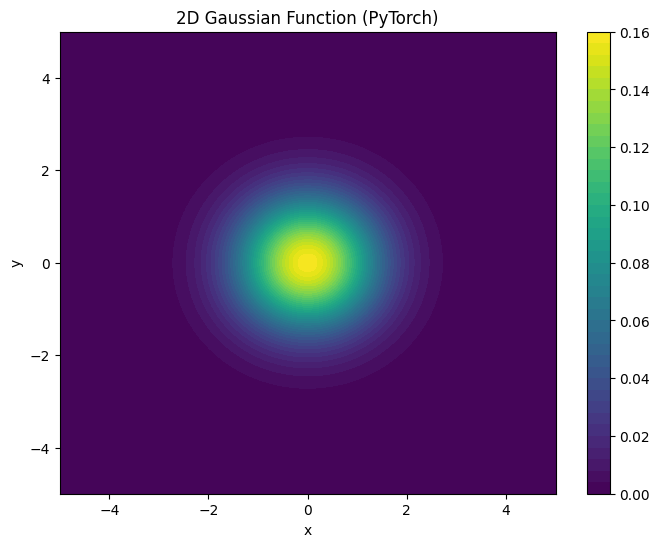

In [71]:
#Having ChatGPT change the prior code to use pyTorch
#Prompt: Convert this to pytorch, using tensors instead of numpy

import torch
import matplotlib.pyplot as plt

# Define the 2D Gaussian function using PyTorch tensors
def gaussian_2d_torch(x, y, mux, muy, sx, sy):
    coeff = 1 / (2 * torch.pi * sx * sy)
    exp_term = torch.exp(-(((x - mux)**2 / (2 * sx**2)) + ((y - muy)**2 / (2 * sy**2))))
    return coeff * exp_term

# Parameters for the Gaussian (use torch tensors)
mux, muy = 0.0, 0.0     # Means
sx, sy = 1.0, 1.0       # Standard deviations

# Create grid of points using torch.linspace and torch.meshgrid
x = torch.linspace(-5, 5, 100)
y = torch.linspace(-5, 5, 100)
X, Y = torch.meshgrid(x, y, indexing='ij')  # indexing='ij' matches np.meshgrid default

# Compute Gaussian values on the grid
Z = gaussian_2d_torch(X, Y, mux, muy, sx, sy)

# Convert Z to numpy for plotting
Z_np = Z.numpy()

# Plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X.numpy(), Y.numpy(), Z_np, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('2D Gaussian Function (PyTorch)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


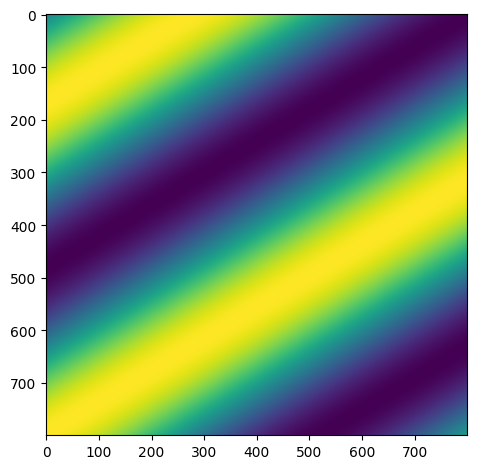

In [72]:
#Sine Function, made by altering the given code, not using AI.

import torch
import numpy as np
#plot
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

# Compute Sine function
z = torch.sin(x+0.6*y)

plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()

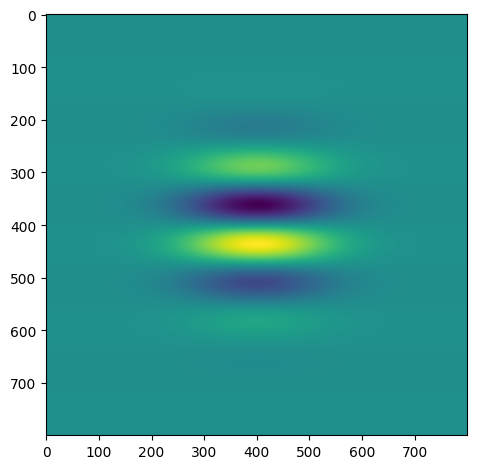

In [73]:
#Sine Function multiplied by gaussian function. No AI usage.

import torch
import numpy as np
#plot
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)



# Compute Sine and gauss functions
sineFunc = torch.sin(4*x)
gaussFunc = torch.exp(-(x**2+y**2)/2.0)
# Multiply the two functions together
z = torch.mul(sineFunc, gaussFunc)

plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()

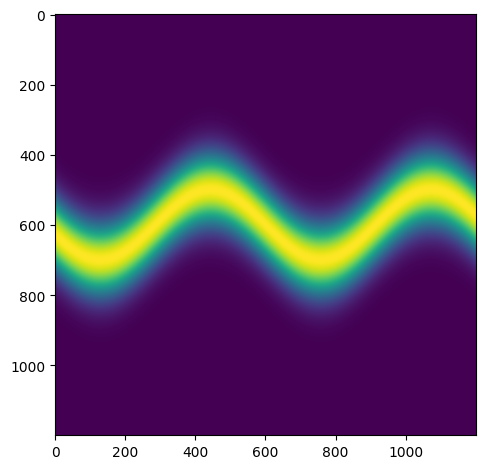

In [74]:
#This was just for fun, but I tried to recreate the normal 'sine wave'

import torch
import numpy as np
#plot
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space
# I made the grid a bit bigger than the examples to see more of the curve
X, Y = np.mgrid[-6.0:6:0.01, -6.0:6:0.01]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)


# I want the points close to where y = sin(x). This equation creates a normal distribution 
# around the points where y = sin (x) (since normal distribution is higher near 0.)
z = torch.exp(-((y - torch.sin(x))**2)) # I don't think I had to 

plt.imshow(z.cpu().numpy().T)   # The .T is to flip the x and y axes to make x horizontal and y vertical.
                                # Not sure why it does this though, it was written by chatGPT.
plt.tight_layout()
plt.show()

C:\Users\p055a\AppData\Local\Temp\ipykernel_3432\3950972280.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


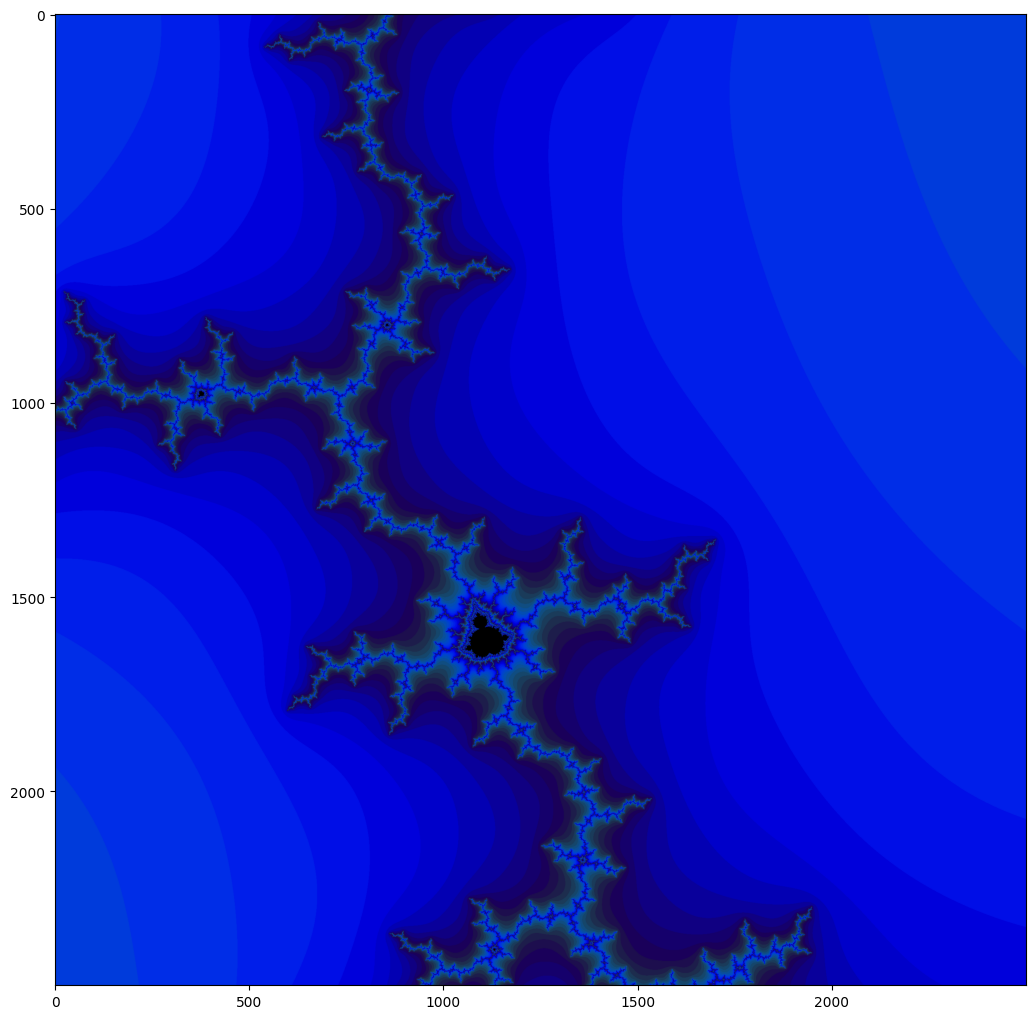

In [ ]:
#Mandlebrot set, copied from the document

import torch
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005] # Original
# Y, X = np.mgrid[-0.8:0:0.0005, -1.5:-1:0.0005] # A bit of zoom
# Y, X = np.mgrid[-0.4:-0.3:0.0001, -1.3:-1.2:0.0001] # More zoom
# Y, X = np.mgrid[-0.375:-0.325:0.00002, -1.275:-1.225:0.00002] # Final zoom (You could zoom more if you want)


# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
        colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

Using device: cpu


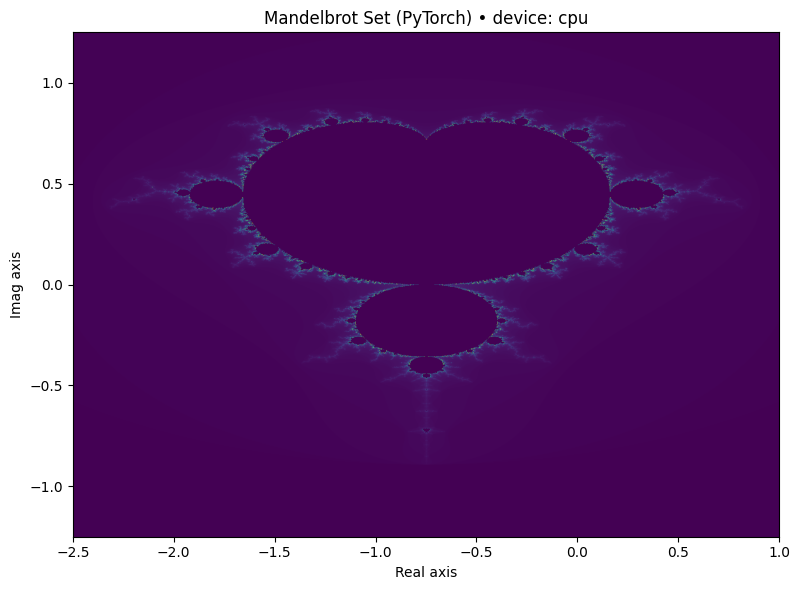

In [ ]:
#Mandelbrot set using ChatGPT:
# Prompt: Generate the Mandlebrot set using pytorch, running on the GPU.
# This prompt gave code that did not run on the GPU, but that is probably an issue with my setup rather than the code.
# The code generates reasonably quickly (7 seconds) but I have not tested with different widths and heights.
# The generated colour scheme is also hard to read

# mandelbrot_torch.py
import torch
import matplotlib.pyplot as plt

def mandelbrot_torch(
    width=1000,
    height=1000,
    max_iters=300,
    x_min=-2.5, x_max=1.0,
    y_min=-1.25, y_max=1.25,
    device=None
):
    # Pick device (GPU preferred)
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device:", device)

    # Build complex grid: c = x + i y
    xs = torch.linspace(x_min, x_max, steps=width, device=device, dtype=torch.float32)
    ys = torch.linspace(y_min, y_max, steps=height, device=device, dtype=torch.float32)
    X, Y = torch.meshgrid(xs, ys, indexing="xy")
    cr, ci = X, Y

    # z = 0; escape iteration counts (0 if never escaped)
    zr = torch.zeros_like(cr)
    zi = torch.zeros_like(ci)
    escape = torch.zeros_like(cr, dtype=torch.int16)
    active = torch.ones_like(cr, dtype=torch.bool)  # not yet escaped

    # Iterate: z = z^2 + c
    for i in range(1, max_iters + 1):
        zr2 = zr * zr
        zi2 = zi * zi
        zr, zi = zr2 - zi2 + cr, 2.0 * zr * zi + ci

        # Mark newly escaped (|z| > 2)
        mag2 = zr * zr + zi * zi
        just_escaped = active & (mag2 > 4.0)
        escape[just_escaped] = i
        active = active & (~just_escaped)

        # Optional early break if all escaped
        if not active.any():
            break

    # Return to CPU for display
    img = escape.t().cpu().numpy()  # transpose so origin='lower' displays correctly
    return img, device

if __name__ == "__main__":
    img, device = mandelbrot_torch(
        width=1600, height=1000, max_iters=300,
        x_min=-2.5, x_max=1.0, y_min=-1.25, y_max=1.25
    )

    plt.figure(figsize=(10, 6))
    plt.imshow(img, extent=[-2.5, 1.0, -1.25, 1.25], origin="lower")
    plt.title("Mandelbrot Set (PyTorch) • device: {}".format(device))
    plt.xlabel("Real axis")
    plt.ylabel("Imag axis")
    plt.tight_layout()
    plt.show()

In [ ]:
# Julia Set. Based on the given code for the mandlebrot set in the task sheet.

import torch
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005] # Original
# Y, X = np.mgrid[-0.8:0:0.0005, -1.5:-1:0.0005] # A bit of zoom
# Y, X = np.mgrid[-0.4:-0.3:0.0001, -1.3:-1.2:0.0001] # More zoom
# Y, X = np.mgrid[-0.375:-0.325:0.00002, -1.275:-1.225:0.00002] # Final zoom (You could zoom more if you want)


# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#TODO Julia set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
        colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()